## Portfolio optimization using Genetic Algorithm

Author: Naresh Elugala

### Background :
   
   **Portfolio optimization** is one of the most interesting fields of study of financial mathematics. Since the birth of Modern Portfolio Theory (MPT) by Harry Markowitz, many scientists have studied a lot of analytical and numerical methods to build the best investment portfolio according to a defined set of assets. The power of genetic algorithms makes it possible to find the optimal portfolio.
In dealing with this Optimization problem, Harry Markowitz 1959 developed a quantitative model, also called **mean-variance model**. The mean-variance model has been usually considered as either the minimization of an objective function representing the portfolio variance (risk) for a given level of return or the maximization of an objective function representing the portfolio return for a given level of risk.


### Problem Statement:
   Let’s say we have selected N financial assets we want to invest in. They can be stock, funds, bonds, ETF etc. Each one of them has many historical returns, that is the price relative difference from one period to another. Periods can be days, weeks, months and so on. Build an investment portfolio with a  mix of many assets (They can be stock, funds, bonds, ETF) together allocating a fraction x of total  capital to each one of them. Each fraction is called weight.  The goal of portfolio optimization is to find the values of the weights that Maximize returns and minimize risk simultaneously of our portfolio under some constraints.

#### Given Data:
Monthly Closing Stock values of HDFC, ITC, L&T, M&M, Sun Pharma and TCS from June 2015 to June 2018.

### Approach and Tasks:

1. Read the data and combine them into one dataframe.
2. Calculate the historical returns for 3 months, 6 months, 12 months, 24 months and 36 months for each of the stocks.
3. Define **Gene** (Scalar): A fraction of the total capital assigned to a stock.
4. Define **Chromosome** (1D Array): Set of genes i.e. fractions of total capital assigned to each stock.
        Check! Sum of each chromosome should be equal to 1.
5. Generate **Initial Population** (2D Array): A set of randomly generated chromosomes.
6. **Fitness function** (Define a Function):
The **Sharpe ratio**, S, is a measure for quantifying the performance (Fitness) of the portfolio which works on "Maximisation of return (mean) and minimisation of risk (Variance) simultaneously" and is computed as
follows:
                
                S = (µ − r)/σ
    
    Here µ is the return of the portfolio over a specified period or Mean portfolio return,
         r is the risk-free rate over the same period and
         σ is the standard deviation of the returns over the specified period or Standard deviation of portfolio return.

      
    Mean portfolio return = Mean Return * Fractions of Total Capital (Chromosome).
    Risk-free rate = 0.0697 ( as per google)
    Standard deviation of portfolio return = (chromosome * Standard deviation)**2 + Covariance * Respective weights in chromosome.
    
7. Select **Elite Population** (Define a Function): It filters the elite chromosomes which have highest returns, which was calculated in fitness function.
    
8. **Mutation**: A function that will perform mutation in a chromosome. Randomly we shall choose 2 numbers between 0, 5 and those elements we shall swap.

9. Crossover: **Heuristic crossover** or **Blend Crossover** uses the ﬁtness values of two parent chromosomes to ascertain the direction of the search. It moves from worst parent to best parent.
The oﬀspring are created according to the equation:
            Off_spring A = Best Parent  + β ∗ ( Best Parent − Worst Parent)
            Off_spring B = Worst Parent - β ∗ ( Best Parent − Worst Parent)
                Where β is a random number between 0 and 1.
This crossover type is good for real-valued genomes.

10. **Next Generation** (define a Function): A function which does mutation,mating or crossover based on a probability and builds a new generation of chromosomes.
    
11. **Iterate the process**: Iterate the whole process till their is no change in maximum returns or for fixed number of iterations.

#### References:
1. https://www.researchgate.net/publication/286952225_A_heuristic_crossover_for_portfolio_selection
2. https://pdfs.semanticscholar.org/9888/061ea3326ff9b41c807ed21f0c10463b7879.pdf
3. https://www.math.kth.se/matstat/seminarier/reports/M-exjobb12/121008.pdf


#### Pre-requisite tasks:

In [3]:
# Clone the repository
!git clone https://github.com/xoTEMPESTox/Portfolio-Optimization-using-Genetic-Algorithm.git

# Navigate to the Stocks_Data folder
%cd Portfolio-Optimization-using-Genetic-Algorithm/Stocks_Data

# List the contents to verify
!ls


Cloning into 'Portfolio-Optimization-using-Genetic-Algorithm'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 28 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (28/28), 80.30 KiB | 830.00 KiB/s, done.
Resolving deltas: 100% (4/4), done.
/content/Portfolio-Optimization-using-Genetic-Algorithm/Stocks_Data
 hdfc.csv   itc.csv  'l&t.csv'	'm&m.csv'   sunpha.csv	 tcs.csv


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

### Task #1:
#### Read the data and combine them into one dataframe.

In [4]:
files=['hdfc.csv','itc.csv','l&t.csv','m&m.csv','sunpha.csv','tcs.csv']
dfs=[]

for file in files:
    temp=pd.read_csv(file)
    temp.columns=['Date',file.replace('.csv','')]
    dfs.append(temp)

stocks = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs)
print(stocks.shape)
stocks.head()

(37, 7)


,Date,hdfc,itc,l&t,m&m,sunpha,tcs
0,June 2018,2108.05,266.05,1271.3,896.80,560.55,1847.20
1,May 2018,2136.15,271.60,1367.6,923.50,480.15,1744.80
2,Apr 2018,1944.60,281.45,1400.6,872.65,528.15,1765.70
3,Mar 2018,1891.45,255.90,1311.9,740.20,495.40,1424.65
4,Feb 2018,1883.80,265.10,1319.1,728.75,535.35,1519.13


### Task #2:
#### Calculate the historical returns for 3 months, 6 months, 12 months, 24 months and 36 months for each of the stock.

**Stock Return**:
The formula for the total stock return is the appreciation in the price plus any dividends paid, divided by the original price of the stock.


In [5]:
def hist_return(months):
    ''' It calculates Stock returns for various months and returns a dataframe.
        Input: Months in the form of a list.
        Output: Historical returns in the form of a DataFrame. '''
    idx=[]
    df=pd.DataFrame()
    for mon in months:
        temp=(stocks.iloc[0,1:] - stocks.iloc[mon,1:])/(stocks.iloc[mon,1:])
        idx.append(str(mon)+'_mon_return')
        df=pd.concat([df, temp.to_frame().T], ignore_index=True)
    df.index=idx
    return df

In [6]:
hist_stock_returns=hist_return([3,6,12,24,36])
hist_stock_returns

,hdfc,itc,l&t,m&m,sunpha,tcs
3_mon_return,0.114515,0.039664,-0.030947,0.211564,0.13151,0.296599
6_mon_return,0.125163,0.011212,0.011417,0.194062,-0.017957,0.368094
12_mon_return,0.275866,-0.178478,0.129783,0.330899,0.010911,0.562537
24_mon_return,0.792712,0.084237,0.274461,0.255179,-0.265911,0.44833
36_mon_return,0.974847,0.266844,0.069614,0.399938,-0.358785,0.447535


### Task #3:
Define **Gene** (Scalar): A fraction of the total capital assigned to a stock. Lets address them as weights.

    Gene can be a fractional value between 0 to 1, such as 0.32 of HDFC or 0.21 of ITC or 0.56 of TCS.

In [7]:
gene = np.random.rand()
gene

0.7218731722170928

In [8]:
import time
def gen_mc_grid(rows, cols, n, N):  # , xfname): generate monte carlo wind farm layout grids
        np.random.seed(seed=int(time.time()))  # init random seed
        layouts = np.zeros((n, rows * cols), dtype=np.int32)  # one row is a layout
        # layouts_cr = np.zeros((n*, 2), dtype=np.float32)  # layouts column row index
        positionX = np.random.randint(0, cols, size=(N * n * 2))
        positionY = np.random.randint(0, rows, size=(N * n * 2))
        ind_rows = 0  # index of layouts from 0 to n-1
        ind_pos = 0  # index of positionX, positionY from 0 to N*n*2-1
        # ind_crs = 0
        while ind_rows < n:
            layouts[ind_rows, positionX[ind_pos] + positionY[ind_pos] * cols] = 1
            if np.sum(layouts[ind_rows, :]) == N:
                # for ind in range(rows * cols):
                #     if layouts[ind_rows, ind] == 1:
                #         r_i = np.floor(ind / cols)
                #         c_i = np.floor(ind - r_i * cols)
                #         layouts_cr[ind_crs, 0] = c_i
                #         layouts_cr[ind_crs, 1] = r_i
                #         ind_crs += 1
                ind_rows += 1
            ind_pos += 1
            if ind_pos >= N * n * 2:
                print("Not enough positions")
                break
        # filename = "positions{}by{}by{}N{}.dat".format(rows, cols, n, N)
#         np.savetxt(lofname, layouts, fmt='%d', delimiter="  ")
        # np.savetxt(xfname, layouts_cr, fmt='%d', delimiter="  ")
        return layouts

def gen_mc_grid_with_NA_loc(rows, cols, n, N,NA_loc):  # , xfname): generate monte carlo wind farm layout grids
        np.random.seed(seed=int(time.time()))  # init random seed
        layouts = np.zeros((n, rows * cols), dtype=np.int32)  # one row is a layout, NA loc is 0

        layouts_NA= np.zeros((n, rows * cols), dtype=np.int32)  # one row is a layout, NA loc is 2
        for i in NA_loc:
            layouts_NA[:,i-1]=2

        # layouts_cr = np.zeros((n*, 2), dtype=np.float32)  # layouts column row index
        positionX = np.random.randint(0, cols, size=(N * n * 2))
        positionY = np.random.randint(0, rows, size=(N * n * 2))
        ind_rows = 0  # index of layouts from 0 to n-1
        ind_pos = 0  # index of positionX, positionY from 0 to N*n*2-1
        # ind_crs = 0
        N_count=0
        while ind_rows < n:
            cur_state=layouts_NA[ind_rows, positionX[ind_pos] + positionY[ind_pos] * cols]
            if cur_state!=1 and cur_state!=2:
                layouts[ind_rows, positionX[ind_pos] + positionY[ind_pos] * cols]=1
                layouts_NA[ind_rows, positionX[ind_pos] + positionY[ind_pos] * cols] = 1
                N_count+=1
                if np.sum(layouts[ind_rows, :]) == N:
                    ind_rows += 1
                    N_count=0
            ind_pos += 1
            if ind_pos >= N * n * 2:
                print("Not enough positions")
                break
        # filename = "positions{}by{}by{}N{}.dat".format(rows, cols, n, N)
#         np.savetxt(lofname, layouts, fmt='%d', delimiter="  ")
#         np.savetxt(loNAfname, layouts_NA, fmt='%d', delimiter="  ")
        # np.savetxt(xfname, layouts_cr, fmt='%d', delimiter="  ")
        return layouts,layouts_NA

In [9]:
gen_mc_grid(5, 5, 100, 50)
gen_mc_grid_with_NA_loc(5, 5, 100, 50,range(10))

Not enough positions
Not enough positions


(array([[0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32),
 array([[2, 2, 2, ..., 1, 1, 2],
        [2, 2, 2, ..., 0, 0, 2],
        [2, 2, 2, ..., 0, 0, 2],
        ...,
        [2, 2, 2, ..., 0, 0, 2],
        [2, 2, 2, ..., 0, 0, 2],
        [2, 2, 2, ..., 0, 0, 2]], dtype=int32))

### Tash #4:
Define **Chromosome** (1D Array): Set of genes i.e. fractions of total capital assigned to each stock. Set of weights.

Its a 1d Array of the fractional values of all the stocks such that sum of the array will not be over 1.
As we have 6 company stocks, we shall generate 6 fractional values (genes) which constitues 1 chromosome.
    
**Why sum should be equal to 1?** As these are fraction of the total capital, we are assuming total capital to be 1 unit.
    
**How to make sure sum =1?** Just generate 6 random numbers and then calculate a factor which is 1 / [sum of random numbers]. Finally multiply each of the random numbers with that factor. The sum will be 1.

In [10]:
def chromosome(n):
    ''' Generates set of random numbers whose sum is equal to 1
        Input: Number of stocks.
        Output: Array of random numbers'''
    ch = np.random.rand(n)
    return ch/sum(ch)

In [11]:
child=chromosome(6)
print(child,sum(child))

[0.17178316 0.19753396 0.06523814 0.10101976 0.16730699 0.29711799] 1.0


### Task #5:

Generate **Initial Population** (2D Array): A set of randomly generated chromosomes

In [12]:
n=6 # Number of stocks = 6
pop_size=100 # initial population = 100

population = np.array([chromosome(n) for _ in range(pop_size)])
print(population.shape)
print(population)

(100, 6)
[[3.83743591e-01 1.21163206e-01 1.52190381e-02 3.72359054e-01
  2.20109643e-02 8.55041470e-02]
 [1.68823454e-01 2.79865375e-01 1.97737321e-01 1.12941151e-01
  1.43949570e-01 9.66831293e-02]
 [2.62046529e-01 1.30378414e-01 1.11791386e-01 2.31402084e-01
  1.38905106e-01 1.25476480e-01]
 [9.14569027e-02 1.26076410e-02 3.01655074e-01 1.70060699e-01
  3.19524233e-02 3.92267260e-01]
 [5.30440038e-01 1.47350530e-02 1.49237019e-01 4.62063988e-02
  5.64472511e-02 2.02934240e-01]
 [2.63206274e-01 7.79361304e-02 6.41354121e-02 2.95367784e-01
  1.89714406e-01 1.09639994e-01]
 [1.34706689e-01 2.35063209e-01 8.31487985e-02 2.64475485e-01
  4.31854934e-02 2.39420325e-01]
 [1.97770709e-01 1.59208787e-01 2.18024605e-01 2.33911335e-01
  2.25055045e-02 1.68579059e-01]
 [2.56138991e-01 1.73021781e-01 5.84709172e-02 2.67707065e-01
  1.66816661e-01 7.78445855e-02]
 [2.60740949e-01 9.73990373e-02 3.72021153e-02 1.48013587e-01
  2.41195281e-01 2.15449031e-01]
 [1.79204805e-01 2.53881140e-01 1.9155620

### Task #6:

**Fitness function** (Define a Function):
The Sharpe ratio, S, is a measure for quantifying the performance (Fitness) of the portfolio and is computed as
follows:
                
                S = (µ − r)/σ
    
    Here µ is the return of the portfolio over a specified period or Mean portfolio return,
         r is the risk-free rate over the same period and
         σ is the standard deviation of the returns over the specified period or Standard deviation of portfolio return.

      
Mean portfolio return = Mean Return * Fractions of Total Capital (Chromosome).

Risk-free rate = 0.0697 ( as per google)

Standard deviation of portfolio return = (chromosome * Standard deviation)**2 + Covariance * Respective weights in chromosome.

 #### Fitness function Sub Task 1:
 Calculate Mean, Standard deviation and covariance of the Historical stock returns.

In [13]:
# Convert to numeric columns from Object datatypes.
print(hist_stock_returns.info())
cols=hist_stock_returns.columns
hist_stock_returns[cols] = hist_stock_returns[cols].apply(pd.to_numeric, errors='coerce')
print(hist_stock_returns.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 3_mon_return to 36_mon_return
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   hdfc    5 non-null      object
 1   itc     5 non-null      object
 2   l&t     5 non-null      object
 3   m&m     5 non-null      object
 4   sunpha  5 non-null      object
 5   tcs     5 non-null      object
dtypes: object(6)
memory usage: 452.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 3_mon_return to 36_mon_return
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hdfc    5 non-null      float64
 1   itc     5 non-null      float64
 2   l&t     5 non-null      float64
 3   m&m     5 non-null      float64
 4   sunpha  5 non-null      float64
 5   tcs     5 non-null      float64
dtypes: float64(6)
memory usage: 452.0+ bytes
None


#### Calculate covariance of historical returns

In [14]:
cov_hist_return=hist_stock_returns.cov()

print(cov_hist_return)

# For ease of calculations make covariance of same variable as zero.
for i in range(6):
    cov_hist_return.iloc[i][i]=0

cov_hist_return

            hdfc       itc       l&t       m&m    sunpha       tcs
hdfc    0.160272  0.045393  0.027916  0.024127 -0.079078  0.014362
itc     0.045393  0.025467 -0.000718  0.004381 -0.023178 -0.005554
l&t     0.027916 -0.000718  0.014206  0.002510 -0.013841  0.007330
m&m     0.024127  0.004381  0.002510  0.007412 -0.011042  0.005700
sunpha -0.079078 -0.023178 -0.013841 -0.011042  0.041781 -0.007211
tcs     0.014362 -0.005554  0.007330  0.005700 -0.007211  0.009923


<ipython-input-14-0835a02cb4ea>:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cov_hist_return.iloc[i][i]=0
<ipython-input-14-0835a02cb4ea>:7: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version,

,hdfc,itc,l&t,m&m,sunpha,tcs
hdfc,0.000000,0.045393,0.027916,0.024127,-0.079078,0.014362
itc,0.045393,0.000000,-0.000718,0.004381,-0.023178,-0.005554
l&t,0.027916,-0.000718,0.000000,0.002510,-0.013841,0.007330
m&m,0.024127,0.004381,0.002510,0.000000,-0.011042,0.005700
sunpha,-0.079078,-0.023178,-0.013841,-0.011042,0.000000,-0.007211
tcs,0.014362,-0.005554,0.007330,0.005700,-0.007211,0.000000


#### Calculate the mean of historical returns

In [15]:
mean_hist_return=hist_stock_returns.mean()
mean_hist_return

,0
hdfc,0.456621
itc,0.044696
l&t,0.090865
m&m,0.278328
sunpha,-0.100047
tcs,0.424619


#### Calculate Standard deviation of historical returns:

In [16]:
sd_hist_return=hist_stock_returns.std()
sd_hist_return

,0
hdfc,0.400340
itc,0.159583
l&t,0.119189
m&m,0.086091
sunpha,0.204405
tcs,0.099615


#### Fitness function Sub Task 2:
 Calculate Expected portfolio return and portfolio variance.

#### Calculate Expected returns of portfolio.

In [17]:
def mean_portfolio_return(child):
    return np.sum(np.multiply(child,mean_hist_return))

In [18]:
mean_portfolio_return(population[0])

np.float64(0.31976630750993396)

#### Calculate portfolio variance.

In [19]:
def var_portfolio_return(child):
    part_1 = np.sum(np.multiply(child,sd_hist_return)**2)
    temp_lst=[]
    for i in range(6):
        for j in range(6):
            temp=cov_hist_return.iloc[i][j] * child[i] * child[j]
            temp_lst.append(temp)
    part_2=np.sum(temp_lst)
    return part_1+part_2

In [20]:
var_portfolio_return(population[0])

<ipython-input-19-c43910aa24c5>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp=cov_hist_return.iloc[i][j] * child[i] * child[j]


np.float64(0.03649504159386151)

#### Risk free factor.

In [21]:
rf= 0.0697

#### Fitness Function of a portfolio.

In [22]:
def fitness_fuction(child):
    ''' This will return the Sharpe ratio for a particular portfolio.
        Input: A child/chromosome (1D Array)
        Output: Sharpe Ratio value (Scalar)'''
    return (mean_portfolio_return(child)-rf)/np.sqrt(var_portfolio_return(child))

In [23]:
fitness_fuction(population[7])

<ipython-input-19-c43910aa24c5>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp=cov_hist_return.iloc[i][j] * child[i] * child[j]


np.float64(1.4039120399401173)

### Task #7:
Select **Elite Population** (Define a Function): It filters the elite chromosomes which have highest returns, which were calculated in fitness function.

In [24]:
def Select_elite_population(population, frac=0.3):
    ''' Select elite population from the total population based on fitness function values.
        Input: Population and fraction of population to be considered as elite.
        Output: Elite population.'''
    population = sorted(population,key = lambda x: fitness_fuction(x),reverse=True)
    percentage_elite_idx = int(np.floor(len(population)* frac))
    return population[:percentage_elite_idx]

In [25]:
print(len(Select_elite_population(population, frac=0.3)))
Select_elite_population(population, frac=0.3)

<ipython-input-19-c43910aa24c5>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp=cov_hist_return.iloc[i][j] * child[i] * child[j]


30


[array([0.0162981 , 0.23452889, 0.08595864, 0.14271155, 0.24611131,
        0.27439151]),
 array([0.06954275, 0.21708652, 0.07757652, 0.07605854, 0.25729351,
        0.30244214]),
 array([0.05447109, 0.16648714, 0.07171982, 0.20411227, 0.19483458,
        0.3083751 ]),
 array([0.02309231, 0.28061291, 0.07328916, 0.16480885, 0.19196294,
        0.26623384]),
 array([0.02479611, 0.07703962, 0.18398681, 0.11621048, 0.20383633,
        0.39413065]),
 array([0.13197006, 0.06141547, 0.047986  , 0.22951276, 0.28844104,
        0.24067468]),
 array([0.01747945, 0.0695324 , 0.06751826, 0.52999925, 0.20434896,
        0.11112168]),
 array([0.02934009, 0.2055251 , 0.13189187, 0.23369884, 0.2673789 ,
        0.1321652 ]),
 array([0.1008914 , 0.22551177, 0.10507583, 0.00288224, 0.26299334,
        0.30264543]),
 array([0.00813446, 0.19360173, 0.11050194, 0.31957091, 0.0375872 ,
        0.33060375]),
 array([0.03984729, 0.16766461, 0.17563267, 0.22913358, 0.21274683,
        0.17497502]),
 array([0.

In [26]:
[fitness_fuction(x) for x in population][:3]

<ipython-input-19-c43910aa24c5>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp=cov_hist_return.iloc[i][j] * child[i] * child[j]


[np.float64(1.3089957902724842),
 np.float64(1.0075981877437077),
 np.float64(1.4181678271721365)]

### Task #8:
**Mutation**: A function that will perform mutation in a chromosome.
            
    Randomly choose 2 numbers between [0, 5] and those elements should be swapped.


In [27]:
def mutation(parent):
    ''' Randomy choosen elements of a chromosome are swapped
        Input: Parent
        Output: Offspring (1D Array)'''
    child=parent.copy()
    n=np.random.choice(range(6),2)
    while (n[0]==n[1]):
        n=np.random.choice(range(6),2)
    child[n[0]],child[n[1]]=child[n[1]],child[n[0]]
    return child

In [29]:
mutation(population[1]),population[1]

(array([0.16882345, 0.11294115, 0.19773732, 0.27986537, 0.14394957,
        0.09668313]),
 array([0.16882345, 0.27986537, 0.19773732, 0.11294115, 0.14394957,
        0.09668313]))

### Task #9:
Crossover: **Heuristic crossover** or **Blend Crossover** uses the ﬁtness values of two parent chromosomes to ascertain the direction of the search. It moves from worst parent to best parent.

The oﬀspring are created according to the equation:
            
            Off_spring A = Best Parent  + β ∗ ( Best Parent − Worst Parent)
            Off_spring B = Worst Parent - β ∗ ( Best Parent − Worst Parent)
                Where β is a random number between 0 and 1.
This crossover type is good for real-valued genomes.

In [30]:
def Heuristic_crossover(parent1,parent2):
    ''' The oﬀsprings are created according to the equation:
            Off_spring A = Best Parent  + β ∗ ( Best Parent − Worst Parent)
            Off_spring B = Worst Parent - β ∗ ( Best Parent − Worst Parent)
                Where β is a random number between 0 and 1.
        Input: 2 Parents
        Output: 2 Children (1d Array)'''
    ff1=fitness_fuction(parent1)
    ff2=fitness_fuction(parent2)
    diff=parent1 - parent2
    beta=np.random.rand()
    if ff1>ff2:
        child1=parent1 + beta * diff
        child2=parent2 - beta * diff
    else:
        child2=parent1 + beta * diff
        child1=parent2 - beta * diff
    return child1,child2

In [ ]:
def Arithmetic_crossover(parent1,parent2):
    ''' The oﬀsprings are created according to the equation:
            Off spring A = α ∗ Parent1 + (1 −α) ∗ Parent2
            Off spring B = (1 −α) ∗ Parent1 + α ∗ Parent2

                Where α is a random number between 0 and 1.
        Input: 2 Parents
        Output: 2 Children (1d Array)'''
    alpha = np.random.rand()
    child1 = alpha * parent1 + (1-alpha) * parent2
    child2 = (1-alpha) * parent1 + alpha * parent2
    return child1,child2

In [34]:
for i in population[:30]:
    for j in population[:30]:
        print(Arithmetic_crossover(i,j))

([0.383743590578682, 0.12116320607889143, 0.01521903810812386, 0.3723590539913327, 0.022010964282338757, 0.08550414696063137], [0.383743590578682, 0.12116320607889143, 0.01521903810812386, 0.3723590539913327, 0.022010964282338757, 0.08550414696063137])
([0.27628352237932796, 0.20051429052537434, 0.10647817961582606, 0.242650102345654, 0.08298026698419203, 0.09109363814962565], [0.27628352237932796, 0.20051429052537434, 0.10647817961582606, 0.242650102345654, 0.08298026698419203, 0.09109363814962565])
([0.3228950599710896, 0.12577081012969915, 0.06350521192083318, 0.3018805692266541, 0.08045803507580343, 0.10549031367592057], [0.3228950599710896, 0.12577081012969915, 0.06350521192083318, 0.3018805692266541, 0.08045803507580343, 0.10549031367592057])
([0.23760024664804108, 0.06688542353436505, 0.1584370560841253, 0.27120987672796926, 0.026981693767375206, 0.23888570323812425], [0.23760024664804108, 0.06688542353436505, 0.1584370560841253, 0.27120987672796926, 0.026981693767375206, 0.2388

In [35]:
Arithmetic_crossover(population[2],population[3])

([0.17675171604044862,
  0.07149302758517276,
  0.20672322989683464,
  0.2007313919632907,
  0.08542876456083988,
  0.2588718699534135],
 [0.17675171604044862,
  0.07149302758517276,
  0.20672322989683464,
  0.2007313919632907,
  0.08542876456083988,
  0.2588718699534135])

### Task#10:
**Next Generation**: A function which does mutation,mating or crossover based on a probability and builds a new generation of chromosomes.

In [38]:
def next_generation(pop_size, elite, crossover=Heuristic_crossover):
    '''Generates new population from elite population with mutation probability as 0.4 and crossover as 0.6.
       Over the final stages, mutation probability is decreased to 0.1.
       Input: Population Size and elite population.
       Output: Next generation population (2D Array).'''
    new_population = []
    elite_range = range(len(elite))

    while len(new_population) < pop_size:
        if len(new_population) > 2 * pop_size / 3:  # Reduce mutation probability in later stages
            mutate_or_crossover = np.random.choice([0, 1], p=[0.9, 0.1])
        else:
            mutate_or_crossover = np.random.choice([0, 1], p=[0.4, 0.6])

        if mutate_or_crossover:
            indx = np.random.choice(elite_range)
            new_population.append(mutation(elite[indx]))
        else:
            p1_idx, p2_idx = np.random.choice(elite_range, 2)
            c1, c2 = crossover(elite[p1_idx], elite[p2_idx])

            # **Fix: Initialize chk as a list**
            chk = []

            for gene in range(6):
                if c1[gene] < 0:
                    chk.append(1)  # Store values in list
                else:
                    chk.append(0)

            if sum(chk) > 0:  # Now sum(chk) works correctly
                p1_idx, p2_idx = np.random.choice(elite_range, 2)
                c1, c2 = crossover(elite[p1_idx], elite[p2_idx])

            new_population.extend([c1, c2])

    return new_population




In [39]:
elite = Select_elite_population(population)
print(next_generation(100, elite)[:3])

<ipython-input-19-c43910aa24c5>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp=cov_hist_return.iloc[i][j] * child[i] * child[j]


[array([0.10524969, 0.29234546, 0.02867929, 0.24471759, 0.17520715,
       0.15380082]), array([0.01747945, 0.06751826, 0.0695324 , 0.52999925, 0.20434896,
       0.11112168]), array([0.15645481, 0.25016653, 0.05134612, 0.22814579, 0.293108  ,
       0.02077875])]


In [40]:
elite=Select_elite_population(population)
next_generation(100,elite,Arithmetic_crossover)[:3]

<ipython-input-19-c43910aa24c5>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp=cov_hist_return.iloc[i][j] * child[i] * child[j]


[[0.09605127899327173,
  0.06343848702842174,
  0.21845865702467215,
  0.2389889473247383,
  0.0342932823253993,
  0.34876934730349696],
 [0.09605127899327173,
  0.06343848702842174,
  0.21845865702467215,
  0.2389889473247383,
  0.0342932823253993,
  0.34876934730349696],
 [0.13158743940077877,
  0.0804175469453695,
  0.22635638059307606,
  0.18643509868456642,
  0.15918015325843665,
  0.21602338111777258]]

### Task #11:
**Iterate the process**: Iterate the whole process till their is no change in maximum returns/min risk or for fixed number of iterations.

#### With Heuristic_crossover:

In [41]:
n=6 # Number of stocks = 6
pop_size=100 # initial population = 100

# Initial population
population = np.array([chromosome(n) for _ in range(pop_size)])

# Get initial elite population
elite = Select_elite_population(population)

iteration=0
Expected_returns=0
Expected_risk=1

while (Expected_returns < 0.30 and Expected_risk > 0.0005) or iteration <= 40:
    print('Iteration:',iteration)
    population = next_generation(100,elite)
    elite = Select_elite_population(population)
    Expected_returns=mean_portfolio_return(elite[0])
    Expected_risk=var_portfolio_return(elite[0])
    print('Expected returns of {} with risk of {}\n'.format(Expected_returns,Expected_risk))
    iteration+=1


print('Portfolio of stocks after all the iterations:\n')
[print(hist_stock_returns.columns[i],':',elite[0][i]) for i in list(range(6))]

<ipython-input-19-c43910aa24c5>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp=cov_hist_return.iloc[i][j] * child[i] * child[j]


Iteration: 0
Expected returns of 0.15308306306116226 with risk of 0.0004685147978868492

Iteration: 1
Expected returns of 0.2436504411243442 with risk of 0.0014202359152588155

Iteration: 2
Expected returns of 0.29421461336321586 with risk of 0.0024143018810947915

Iteration: 3
Expected returns of 0.23933093736052102 with risk of 0.001383557633997598

Iteration: 4
Expected returns of 0.24669121909077618 with risk of 0.0009792491224008219

Iteration: 5
Expected returns of 0.2584071519408648 with risk of 0.0010342542512461646

Iteration: 6
Expected returns of 0.21985174770483726 with risk of 0.0008834509568679504

Iteration: 7
Expected returns of 0.36721172995994694 with risk of 0.0037484594160443665

Iteration: 8
Expected returns of 0.2129945231931224 with risk of 0.0008901758488909679

Iteration: 9
Expected returns of 0.21779515526890045 with risk of 0.0007411831283577301

Iteration: 10
Expected returns of 0.19487132107010097 with risk of 0.0006695676465934414

Iteration: 11
Expected r

[None, None, None, None, None, None]

### Weights and their respective returns:

In [42]:
print('Portfolio of stocks after all the iterations:\n')
[print(hist_stock_returns.columns[i],':',elite[0][i]) for i in list(range(6))]

print('\nExpected returns of {} with risk of {}\n'.format(Expected_returns,Expected_risk))

Portfolio of stocks after all the iterations:

hdfc : 0.6079681766063095
itc : 0.3051637928306941
l&t : -0.8281297176008628
m&m : -1.6440969650906494
sunpha : 0.9089664328165897
tcs : 1.6501282804379291

Expected returns of 0.36814021022864646 with risk of 0.0004459687910572663



Although heuristic method works well, it gives negative returns which is not expected.

In [43]:
fitness_fuction(elite[5])

<ipython-input-19-c43910aa24c5>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp=cov_hist_return.iloc[i][j] * child[i] * child[j]


np.float64(11.873915950404431)

## BEST Approach using Arithmetic_crossover:

In [44]:
n=6 # Number of stocks = 6
pop_size=100 # initial population = 100

# Initial population
population = np.array([chromosome(n) for _ in range(pop_size)])

# Get initial elite population
elite = Select_elite_population(population)

iteration=0
Expected_returns=0
Expected_risk=1

while (Expected_returns < 0.30 and Expected_risk > 0.0005) or iteration <= 40:
    print('Iteration:',iteration)
    population = next_generation(100,elite,Arithmetic_crossover)
    elite = Select_elite_population(population)
    Expected_returns=mean_portfolio_return(elite[0])
    Expected_risk=var_portfolio_return(elite[0])
    print('Expected returns of {} with risk of {}\n'.format(Expected_returns,Expected_risk))
    iteration+=1


print('Portfolio of stocks after all the iterations:\n')
[print(hist_stock_returns.columns[i],':',elite[0][i]) for i in list(range(6))]

<ipython-input-19-c43910aa24c5>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp=cov_hist_return.iloc[i][j] * child[i] * child[j]


Iteration: 0
Expected returns of 0.13241943576458437 with risk of 0.00018713947073983103

Iteration: 1
Expected returns of 0.15848388143174855 with risk of 0.0004379947211279817

Iteration: 2
Expected returns of 0.15718955742866356 with risk of 0.0004137957795868801

Iteration: 3
Expected returns of 0.15905059980125175 with risk of 0.0004521323426166972

Iteration: 4
Expected returns of 0.15672799819713676 with risk of 0.00043770394177745486

Iteration: 5
Expected returns of 0.15917656111580714 with risk of 0.00046698698618916415

Iteration: 6
Expected returns of 0.16010769188398274 with risk of 0.00047817840653202864

Iteration: 7
Expected returns of 0.1594327966386584 with risk of 0.0004721554353210077

Iteration: 8
Expected returns of 0.1594327966386584 with risk of 0.0004721554353210077

Iteration: 9
Expected returns of 0.1594327966386584 with risk of 0.0004721554353210077

Iteration: 10
Expected returns of 0.15931851295103036 with risk of 0.0004710771501935315

Iteration: 11
Expec

[None, None, None, None, None, None]


Portfolio Allocation:
 Stock  Weight (%)
  hdfc    5.067595
   itc   20.927216
   l&t    7.203465
   m&m   11.396660
sunpha   27.932780
   tcs   27.472284

Expected Returns: 15.95%
Risk: 0.05%


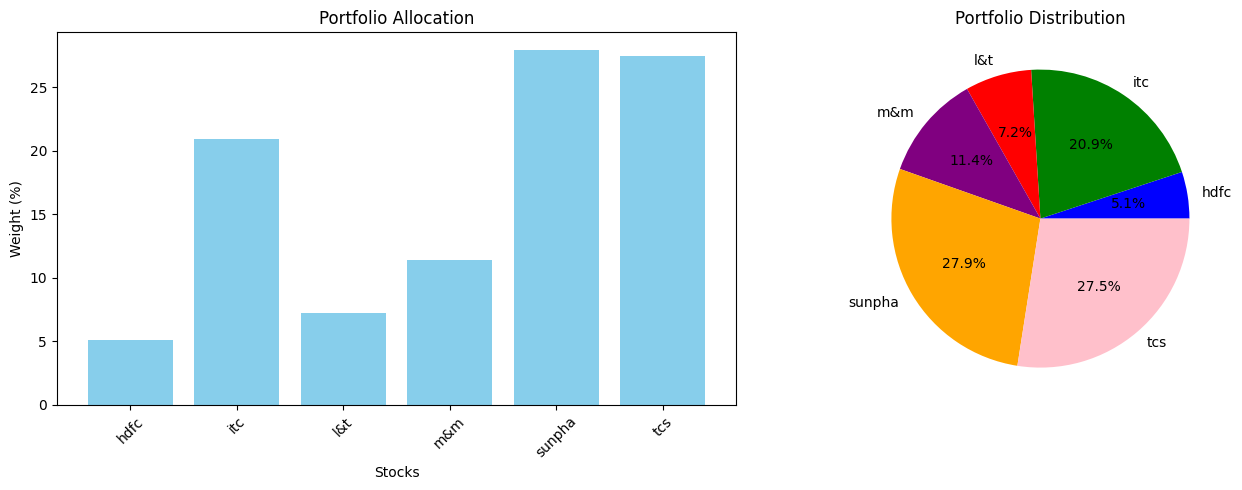

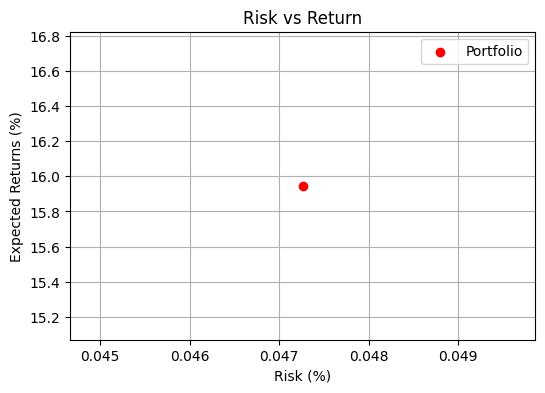

In [49]:
# Extract portfolio weights and convert them to percentages
stock_names = hist_stock_returns.columns[:6]
weights = [elite[0][i] * 100 for i in range(6)]  # Convert to percentage

# Convert expected returns and risk to percentages
expected_return_pct = Expected_returns * 100
expected_risk_pct = Expected_risk * 100

# Create DataFrame for better table display
portfolio_df = pd.DataFrame({'Stock': stock_names, 'Weight (%)': weights})

# Print as a table
print("\nPortfolio Allocation:")
print(portfolio_df.to_string(index=False))  # Pretty-print table

print("\nExpected Returns: {:.2f}%".format(expected_return_pct))
print("Risk: {:.2f}%".format(expected_risk_pct))

# --- Visualization ---
plt.figure(figsize=(14, 5))

# 1. Bar Chart for Portfolio Weights
plt.subplot(1, 2, 1)
plt.bar(stock_names, weights, color='skyblue')
plt.xlabel("Stocks")
plt.ylabel("Weight (%)")
plt.title("Portfolio Allocation")
plt.xticks(rotation=45)

# 2. Pie Chart for Portfolio Weights
plt.subplot(1, 2, 2)
plt.pie(weights, labels=stock_names, autopct='%1.1f%%', colors=['blue', 'green', 'red', 'purple', 'orange', 'pink'])
plt.title("Portfolio Distribution")

plt.tight_layout()
plt.show()

# 3. Risk-Return Scatter Plot (Using percentages)
plt.figure(figsize=(6, 4))
plt.scatter(expected_risk_pct, expected_return_pct, color='red', label='Portfolio')
plt.xlabel("Risk (%)")
plt.ylabel("Expected Returns (%)")
plt.title("Risk vs Return")
plt.legend()
plt.grid(True)
plt.show()